In [1]:
#importing libraries 

import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#importing Data...
loc=os.getcwd()+'\ex1\ex1data1.txt'
data = pd.read_csv(loc,header=None,names=["Populations","Profits"])
data.head()

,Populations,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
#Statsical desicriptions...
data.describe()

,Populations,Profits
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


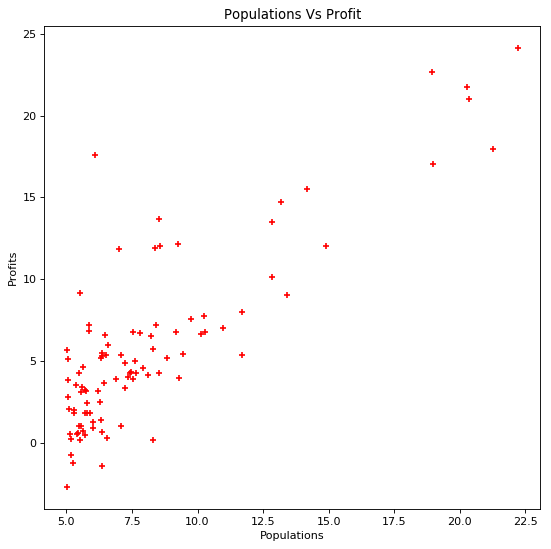

In [4]:
#scatter plot between Populations Vs Profit 
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x= data.Populations,y=data.Profits,color = "red",marker= "+")

plt.title("Populations Vs Profit")
plt.xlabel("Populations")
plt.ylabel("Profits")

plt.show()

In [5]:
#defining the cost function...
def computeCost(X,y,theta):
    m= len(X)
    cost =np.power(((X*theta.T)-y),2)
    J = np.sum(cost)/(2*m)
    return J

In [6]:
#Adding first columns to 1...
data.insert(0, 'Ones', 1)

In [7]:
#number of colums
cols = data.shape[1]

In [8]:
#creating X (independent variable)
X = data.iloc[:,0:cols-1]

In [9]:
#(Creating Dependent Variable)
y = data.iloc[:,cols-1:cols]

In [10]:
#Converting it to matrix form...
X = np.matrix(X.values)
y =np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [11]:
#checking the shape's of matrix's 
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [12]:
#creating Function for Gradient_descent...
def Gradient(X,y,theta,alpha,iters):
    #adding a temprory variable which we take intialy as thetha
    temp = np.matrix(np.zeros(theta.shape))
    #Number of Parameter's that will be in the model...
    parameter = theta.ravel().shape[1]
    cost = np.zeros(iters)
    
    #looping over number of iterations...
    for i in range(iters):
        #creating error term...
        error = (X*theta.T) -y
        
        for j in range(parameter):
            #derivative term's for each columns while looping 
            term = np.multiply(error,X[:,j])
            #finding optimise theta...
            temp[0,j]= theta[0,j] - ((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta)
        
    return theta , cost    
    
    

In [13]:
alpha = 0.01
iters = 1000

In [14]:
Gradient(X,y,theta,alpha,iters)

(matrix([[-3.24140214,  1.1272942 ]]),
 array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
        5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
        5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
        5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
        5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
        5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
        5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
        5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
        5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
        5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
        5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
        5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
        5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
        5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
        5

In [15]:
g, cost = Gradient(X, y, theta, alpha, iters)

In [16]:
predicted_value=np.multiply(g[:,0],X[:,0]) + np.multiply(g[:,1],X[:,1])

In [17]:
computeCost(X,y,g)

4.515955503078912

In [18]:
#calculating the standard error 
def squared_error(y,predicted_value):
    return sum((y - predicted_value).T * (y - predicted_value))
squared_error(y,predicted_value)


matrix([[876.0953676]])

In [19]:
#calculating value of R^2.
squared_error_regr = squared_error(y,predicted_value)
squared_error_y_mean = squared_error(y,y.mean())
coefficient_of_determination=  1 - (squared_error_regr/squared_error_y_mean)

coefficient_of_determination

matrix([[0.69943693]])

Text(0.5,1,'Error vs. Training Epoch')

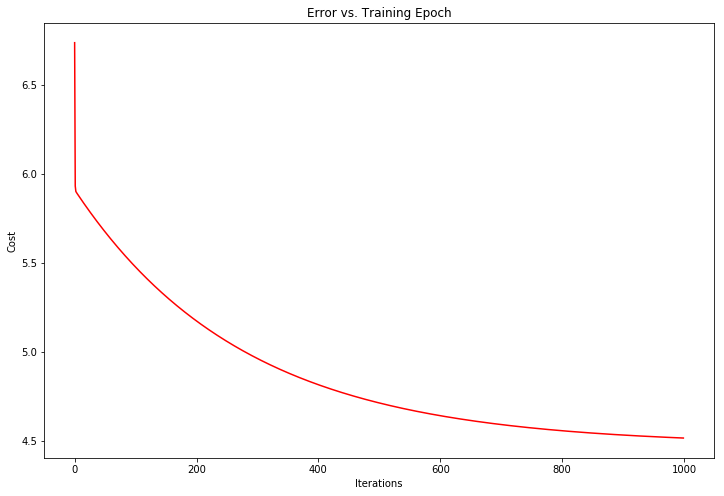

In [20]:

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [22]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5,1,'Predicted Profits vs. Populations Size')

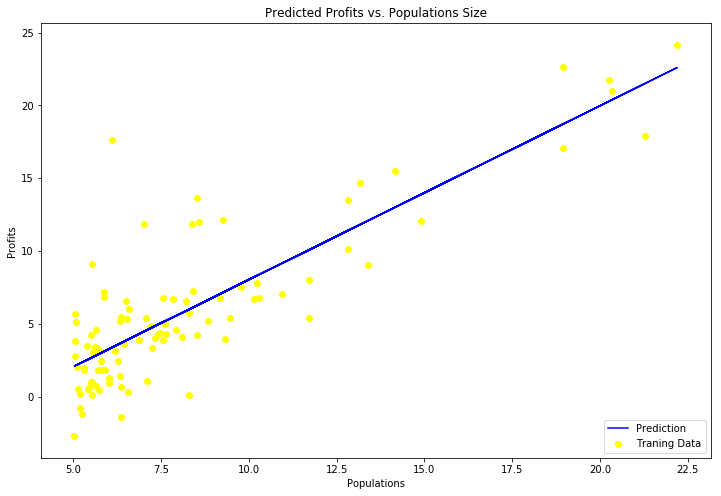

In [43]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'b', label='Prediction')
ax.scatter(data.Populations, data.Profits, label='Traning Data',c='yellow')
ax.legend(loc=4)
ax.set_xlabel('Populations')
ax.set_ylabel('Profits')
ax.set_title('Predicted Profits vs. Populations Size')


Text(0.5,1,'Population Size Vs Predicted Profit plot')

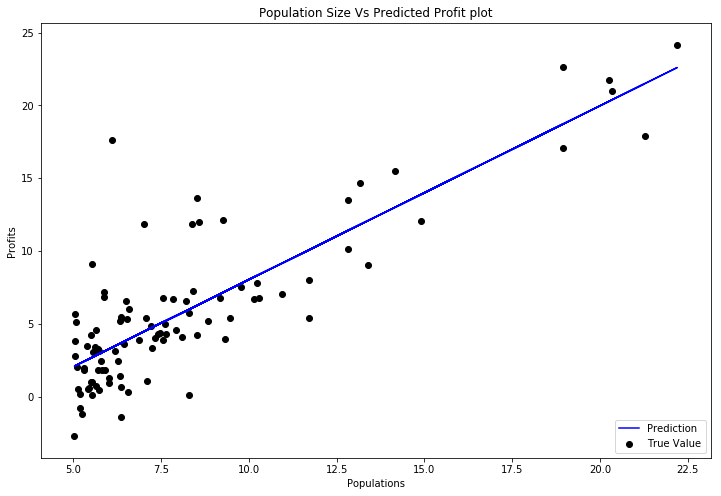

In [50]:
x= np.array(X[:,1]).flatten()
y = model.predict(X).flatten()


fig ,ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'b',label="Prediction")
ax.scatter(data.Populations,data.Profits,label="True Value",c="black")
ax.legend(loc=4)
ax.set_xlabel("Populations")
ax.set_ylabel("Profits")
ax.set_title("Population Size Vs Predicted Profit plot")